In [86]:
import string
import random
from PIL import Image, ImageOps, ImageDraw, ImageFont, ImageChops
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
from ipywidgets import interactive, HBox, VBox
from img_processing import preprocess_img, DITHER_MODES
from ascii_art_non_mono_utils import *

In [30]:
font_path = "fonts/OpenSans-Regular.ttf"
size = 20

In [31]:
orig_img = Image.open("imgs/irad_grad.bmp").convert("L")
#orig_img = ImageOps.invert(orig_img)

print(orig_img.size)

(512, 512)


In [32]:
def i_preprocess_img(scale_factor, contrast, brightness, quantize_colors, eq, dither):
    proc_img = preprocess_img(orig_img, scale_factor, 1.3, 0.9, eq, 4, DITHER_MODES.BAYER)
    plt.imshow(proc_img, cmap='gray', vmin=0, vmax=255, interpolation='none')

    plt.figure(figsize=(9, 3))
    plt.xticks([x for x in range(0, len(proc_img.histogram()), 25)])
    plt.bar([x for x in range(0, len(proc_img.histogram()))], proc_img.histogram())
    plt.grid()
    plt.show()

    return proc_img

interactive_preprocess = interactive(i_preprocess_img,
            scale_factor=(0.01, 1, 0.01),
            contrast=(0, 2, 0.01),
            brightness=(0, 2, 0.01),
            eq=(0, 1, 0.01),
            quantize_colors=(1, 256, 1),
            dither=DITHER_MODES)

controls = VBox(interactive_preprocess.children[:-1])
display(HBox((controls, interactive_preprocess.children[-1])))

In [33]:
proc_img = interactive_preprocess.result

bg_img = Image.new("L", proc_img.size, 0)

fnt = ImageFont.truetype(font_path, size)
draw = ImageDraw.Draw(bg_img)

In [34]:
palette = list(filter(lambda a: a.isprintable(), string.printable))

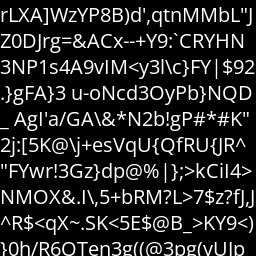

In [35]:
draw.rectangle(((0,0), bg_img.size), fill=0)
text = []
bbox = draw.textbbox((0,0), ''.join(text), font=fnt)
img_size = bg_img.size
while bbox[3] < img_size[1]:
    while bbox[2] < img_size[0]:
        text += palette[random.randint(0, len(palette)-1)]
        bbox = draw.textbbox((0,0), ''.join(text), font=fnt)
    text.pop()
    text.append('\n')
    bbox = draw.textbbox((0,0), ''.join(text), font=fnt)

draw.multiline_text((0,0), ''.join(text), font=fnt, fill=255)
bg_img

In [36]:
text_lines = []
line_begin = 0
char_sum = 0
for i in range(len(text)):
    if text[i] == '\n':
        text_lines.append(text[line_begin:i+1])
        char_sum += len(text_lines[-1])
        line_begin = i+1

print(len(text_lines), char_sum / len(text_lines))

for l in text_lines:
    print(''.join(l), end='')

10 24.7
rLXA]WzYP8B)d',qtnMMbL"J
Z0DJrg=&ACx--+Y9:`CRYHN
3NP1s4A9vIM<y3l\c}FY|$92
.}gFA}3 u-oNcd3OyPb}NQD
_ AgI'a/GA\&*N2b!gP#*#K"
2j:[5K@\j+esVqU{QfRU{JR^
"FYwr!3Gz}dp@%|};>kCiI4>
NMOX&.I\,5+bRM?L>7$z?fJ,J
^R$<qX~.SK<5E$@B_>KY9<)
}0h/R6QTen3g((@3pg(yUJp


In [37]:
bg_img = Image.new("L", proc_img.size, 0)

draw = ImageDraw.Draw(bg_img)

In [38]:
pos = (0,0)
bbox = draw.textbbox(pos, ''.join(palette), font=fnt)
img_size = proc_img.size
lines = []
while bbox[3] < img_size[1]:
    bbox = draw.textbbox(pos, ''.join(palette), font=fnt)
    if (abs(img_size[1] - bbox[1]) > abs(bbox[1] - bbox[3])):
        lines.append(proc_img.crop((pos[0], pos[1], img_size[0], bbox[3])))
    pos = (0,bbox[3])

print(len(lines))
line = lines[len(lines) // 2]
line

9


In [39]:
def generate_random_line():
    line_size = line.size
    bg_img = Image.new("L", line_size, 0)

    draw = ImageDraw.Draw(bg_img)

    text = []

    bbox = draw.textbbox(pos, ''.join(text), font=fnt)

    while line_size[0] > bbox[2]:
        text.append(palette[random.randint(0, len(palette)-1)])
        bbox = draw.textbbox((0,0), ''.join(text), font=fnt)
    text.pop()
    draw.text((0,0), ''.join(text), font=fnt, fill=255)
    return bg_img

generate_random_line()

In [69]:
def new_random_solution(line, last_solution):
    r_l = generate_random_line()
    diff = ImageChops.difference(line, r_l)
    last_diff = ImageChops.difference(line, last_solution)
    if np.sum(diff) < np.sum(last_diff):
        return r_l
    else:
        return last_solution


997002
995167


In [70]:

sol = new_random_solution(line, generate_random_line())
print(np.sum(ImageChops.difference(line, sol)))
sol

1008963


In [74]:
for i in range(0, 100000):
    sol = new_random_solution(line, sol)
    if (i % 1000 == 0):
        print(np.average(ImageChops.difference(line, sol)))

print(np.average(ImageChops.difference(line, sol)))
sol

141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800925927
141.42722800

In [87]:
def generate_greedy_line():
    line_size = line.size
    bg_img, draw = new_img_draw(line_size)

    text = []

    bbox = draw.textbbox((0,0), ''.join(text), font=fnt)

    while line_size[0] > bbox[2]:
        best_c = palette[0]
        text.append(palette[0])
        draw.text((0,0), ''.join(text), font=fnt, fill=255)
        best_c_diff = np.average(ImageChops.difference(line, bg_img))
        text.pop()
        clear_img(draw, line_size)
        for i in range(1, len(palette)):
            text.append(palette[i])
            draw.text((0,0), ''.join(text), font=fnt, fill=255)
            diff = np.average(ImageChops.difference(line, bg_img))
            if diff < best_c_diff:
                best_c = palette[i]
                best_c_diff = diff
            text.pop()
            clear_img(draw, line_size)
        text.append(best_c)
        bbox = draw.textbbox((0,0), ''.join(text), font=fnt)
    text.pop()
    draw.text((0,0), ''.join(text), font=fnt, fill=255)
    return bg_img

In [88]:
generate_greedy_line()

TypeError: clear_img() missing 1 required positional argument: 'size'